<a href="https://colab.research.google.com/github/gyeongdong13/Project/blob/main/O2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv', encoding='utf-8')
df

col_name = ['고객번호', '잔액', '잔액 업데이트 빈도', '구매금액', '일시불 구매금액', "할부 구매금액", "현금 선지급", "구매빈도", "일회성 구매빈도", "할부 구매빈도", "현금 선지급 빈도", "현금 선지급 거래수", "구매건수", "카드 한도", "지불금액","지불한 최소금액", "지불한 전액 지불비율","카드 서비스 기간"]
df.columns = col_name
df
# 최대구매금액 + 할부 구매금액 = 구매금액
# 구매빈도와 일회성 구매빈도의 차이점은 무엇일까?

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객번호         8950 non-null   object 
 1   잔액           8950 non-null   float64
 2   잔액 업데이트 빈도   8950 non-null   float64
 3   구매금액         8950 non-null   float64
 4   일시불 구매금액     8950 non-null   float64
 5   할부 구매금액      8950 non-null   float64
 6   현금 선지급       8950 non-null   float64
 7   구매빈도         8950 non-null   float64
 8   일회성 구매빈도     8950 non-null   float64
 9   할부 구매빈도      8950 non-null   float64
 10  현금 선지급 빈도    8950 non-null   float64
 11  현금 선지급 거래수   8950 non-null   int64  
 12  구매건수         8950 non-null   int64  
 13  카드 한도        8949 non-null   float64
 14  지불금액         8950 non-null   float64
 15  지불한 최소금액     8637 non-null   float64
 16  지불한 전액 지불비율  8950 non-null   float64
 17  카드 서비스 기간    8950 non-null   int64  
dtypes: float64(14), int64(3), object(1)
memory usage

In [ ]:
df.isnull().sum()

고객번호             0
잔액               0
잔액 업데이트 빈도       0
구매금액             0
일시불 구매금액         0
할부 구매금액          0
현금 선지급           0
구매빈도             0
일회성 구매빈도         0
할부 구매빈도          0
현금 선지급 빈도        0
현금 선지급 거래수       0
구매건수             0
카드 한도            1
지불금액             0
지불한 최소금액       313
지불한 전액 지불비율      0
카드 서비스 기간        0
dtype: int64

In [ ]:
# 카드한도는 0일 수 없기 때문에 평균값으로 대체(널 값 하나 존재) -> 최솟값과 최댓값은 편차가 너무 큼
# 지불한 최소금액은 중앙값으로 대체(널 값 313개 존재) -> 최댓값이 너무 커서 평균에 영향을 끼칠 것이라 판단(중앙값 사용)
df.describe()

,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.loc[df["잔액"] >= 19043]

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.75,1.0,0.0,0,216,18000.0,23018.57583,18621.01331,0.0,12


In [ ]:
df.loc[df["구매금액"] >= 49039]

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# 구매금액에 비해 현금 선지급이 너무 많음 -> 무슨 고객일까
df.loc[df["현금 선지급"] >= 47137]

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [ ]:
df = df.fillna({"카드 한도":3000,"지불한 최소금액":312.34})
df

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.340000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.340000,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# 고객번호 중복 없음
df["고객번호"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Name: 고객번호, Length: 8950, dtype: bool

In [ ]:
df.corr()

,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
잔액,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
잔액 업데이트 빈도,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
구매금액,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
일시불 구매금액,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
할부 구매금액,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
현금 선지급,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
구매빈도,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
일회성 구매빈도,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
할부 구매빈도,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
현금 선지급 빈도,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


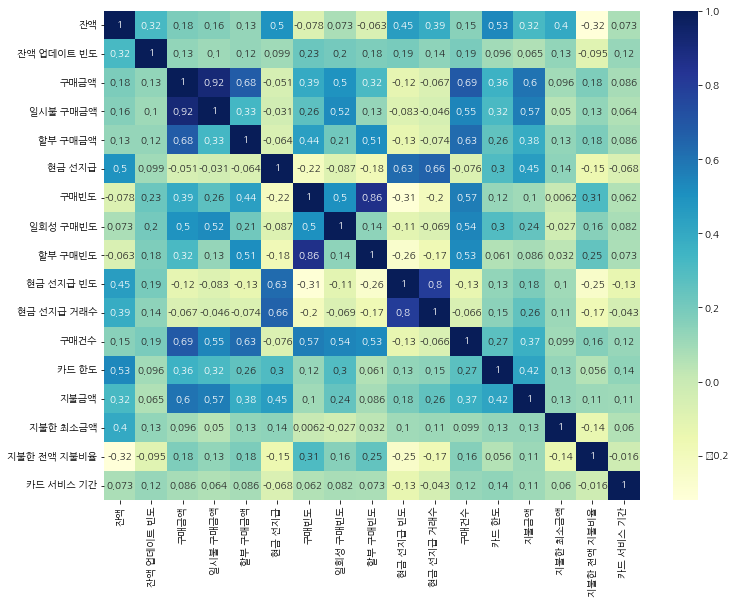

In [ ]:
import seaborn as sns
plt.rc('font', family='NanumGothic')

plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [ ]:
corr = df.corr()["구매금액"].sort_values(ascending = False)
corr

구매금액           1.000000
일시불 구매금액       0.916845
구매건수           0.689561
할부 구매금액        0.679896
지불금액           0.603264
일회성 구매빈도       0.498430
구매빈도           0.393017
카드 한도          0.356977
할부 구매빈도        0.315567
잔액             0.181261
지불한 전액 지불비율    0.180379
잔액 업데이트 빈도     0.133674
지불한 최소금액       0.095789
카드 서비스 기간      0.086288
현금 선지급        -0.051474
현금 선지급 거래수    -0.067175
현금 선지급 빈도     -0.120143
Name: 구매금액, dtype: float64

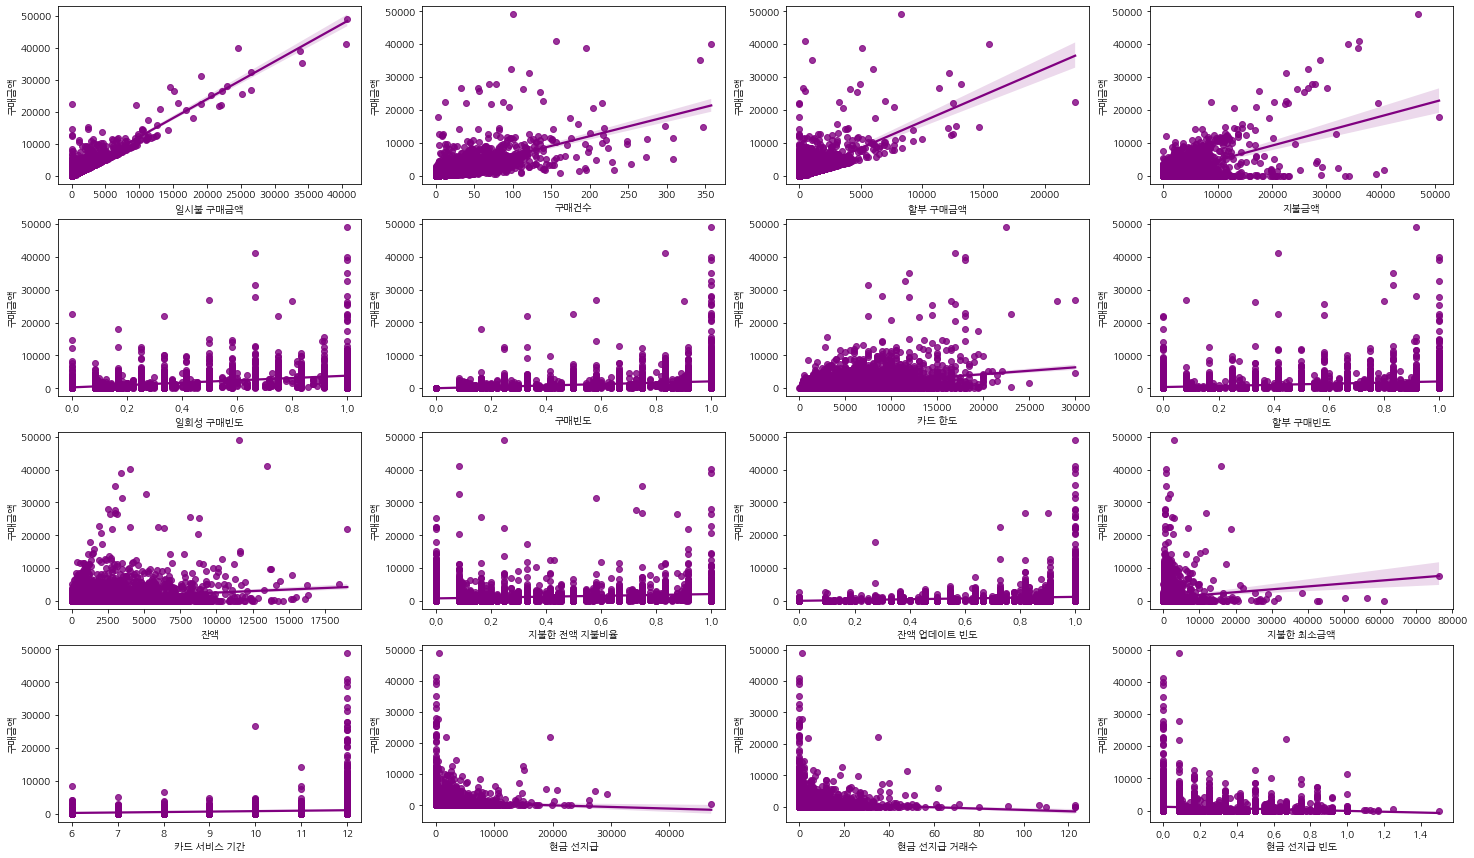

In [ ]:
# 4개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*4개의 ax를 가짐
fig, axs = plt.subplots(figsize=(25,15), ncols=4, nrows=4)
lm_features = ["일시불 구매금액", "구매건수", "할부 구매금액", "지불금액", "일회성 구매빈도", "구매빈도", "카드 한도", "할부 구매빈도", "잔액", "지불한 전액 지불비율", "잔액 업데이트 빈도", "지불한 최소금액", "카드 서비스 기간", "현금 선지급", "현금 선지급 거래수", "현금 선지급 빈도"]
for i, feature in enumerate(lm_features) :
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature, y="구매금액", color="purple", data=df, ax=axs[row][col])

In [ ]:
df["현금 선지급 거래수"] = df["현금 선지급 거래수"].astype(float)
df["구매건수"] = df["구매건수"].astype(float)
df["카드 서비스 기간"] = df["카드 서비스 기간"].astype(float)

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_train = df[['잔액', '잔액 업데이트 빈도', '일시불 구매금액', "할부 구매금액", "구매빈도", "일회성 구매빈도", "할부 구매빈도", "현금 선지급 빈도", "구매건수", "카드 한도", "지불금액", "지불한 전액 지불비율"]]

def feature_engineering_xbyVIF(X_train) :
  vif = pd.DataFrame()
  vif["VIF_Factor"] = [variance_inflation_factor(X_train.values, i)
  for i in range(X_train.shape[1])]
  vif["Feature"] = X_train.columns
  return vif

vif = feature_engineering_xbyVIF(X_train)
print(vif)

    VIF_Factor      Feature
0     3.315837           잔액
1     5.277809   잔액 업데이트 빈도
2     2.441448     일시불 구매금액
3     2.417556      할부 구매금액
4    26.208766         구매빈도
5     5.614436     일회성 구매빈도
6    17.240845      할부 구매빈도
7     2.201478    현금 선지급 빈도
8     4.240521         구매건수
9     4.083148        카드 한도
10    2.609607         지불금액
11    1.687252  지불한 전액 지불비율


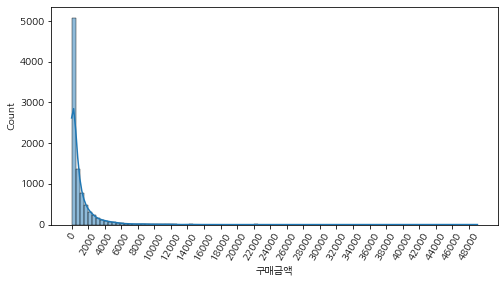

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,50000,2000), rotation=60)
sns.histplot(df["구매금액"],bins=100, kde=True)
plt.show()

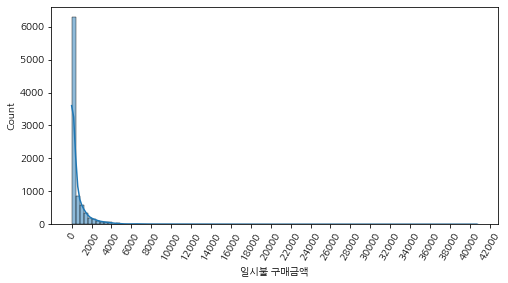

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,50000,2000), rotation=60)
sns.histplot(df["일시불 구매금액"],bins=100, kde=True)
plt.show()

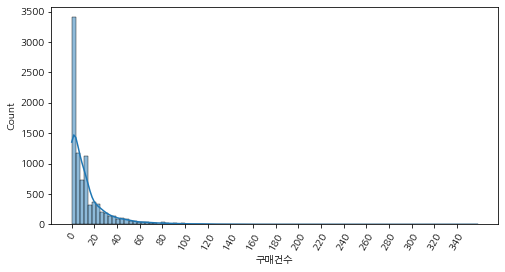

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,360,20), rotation=60)
sns.histplot(df["구매건수"],bins=100, kde=True)
plt.show()

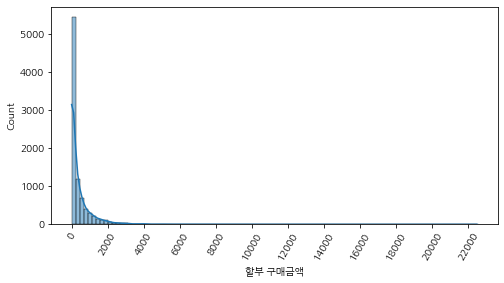

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,22500,2000), rotation=60)
sns.histplot(df["할부 구매금액"],bins=100, kde=True)
plt.show()

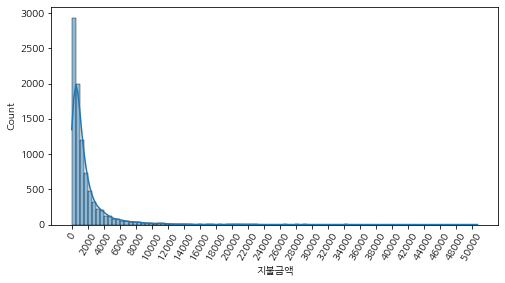

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,51000,2000), rotation=60)
sns.histplot(df["지불금액"],bins=100, kde=True)
plt.show()

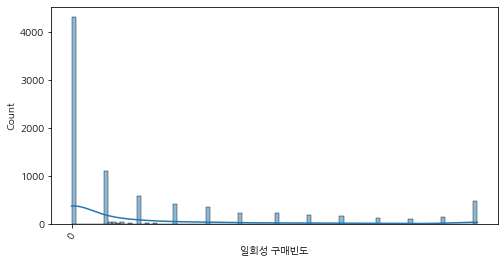

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,1), rotation=60)
sns.histplot(df["일회성 구매빈도"],bins=100, kde=True)
plt.show()

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    # IQR을 구하고, IQR에 1.5를 곱해서 최댓값과 최솟값 지점을 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud<lowest_val) | (fraud>highest_val)].index
    return outlier_index

In [ ]:
outlier_index = get_outlier(df=df, column="일시불 구매금액", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)

이상치 데이터 인덱스: Int64Index([   3,    6,   11,   12,   21,   23,   37,   51,   53,   57,
            ...
            8689, 8724, 8725, 8736, 8737, 8748, 8758, 8801, 8843, 8897],
           dtype='int64', length=1013)


In [ ]:
outlier_index = get_outlier(df=df, column="구매건수", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)

이상치 데이터 인덱스: Int64Index([   6,   21,   30,   31,   48,   57,   64,   84,   87,   90,
            ...
            8489, 8541, 8590, 8661, 8662, 8689, 8707, 8737, 8847, 8856],
           dtype='int64', length=766)


# 클러스터링

In [ ]:
df2 = df[["구매금액", "일시불 구매금액", "구매건수", "할부 구매금액", "지불금액"]]
df2

,구매금액,일시불 구매금액,구매건수,할부 구매금액,지불금액
0,95.40,0.00,2.0,95.40,201.802084
1,0.00,0.00,0.0,0.00,4103.032597
2,773.17,773.17,12.0,0.00,622.066742
3,1499.00,1499.00,1.0,0.00,0.000000
4,16.00,16.00,1.0,0.00,678.334763
...,...,...,...,...,...
8945,291.12,0.00,6.0,291.12,325.594462
8946,300.00,0.00,6.0,300.00,275.861322
8947,144.40,0.00,5.0,144.40,81.270775
8948,0.00,0.00,0.0,0.00,52.549959


In [ ]:
# 로그 변환
df2_copy = df2.copy()
_purchase = np.log1p(df2_copy["지불금액"])
df2_copy.insert(0,"정규화 지불금액", _purchase)

sale_purchase = np.log1p(df2_copy["할부 구매금액"])
df2_copy.insert(0,"정규화 할부 구매금액", sale_purchase)

count_purchase = np.log1p(df2_copy["구매건수"])
df2_copy.insert(0,"정규화 구매건수", count_purchase)

oneoff_purchase = np.log1p(df2_copy["일시불 구매금액"])
df2_copy.insert(0,"정규화 일시불 구매금액", oneoff_purchase)

purchase = np.log1p(df2_copy["구매금액"])
df2_copy.insert(0,"정규화 구매금액", purchase)

df2_copy.drop(["구매금액", "일시불 구매금액", "구매건수", "할부 구매금액", "지불금액"], axis=1, inplace=True)
df2_copy

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
0,4.568506,0.000000,1.098612,4.568506,5.312231
1,0.000000,0.000000,0.000000,0.000000,8.319725
2,6.651791,6.651791,2.564949,0.000000,6.434654
3,7.313220,7.313220,0.693147,0.000000,0.000000
4,2.833213,2.833213,0.693147,0.000000,6.521114
...,...,...,...,...,...
8945,5.677165,0.000000,1.945910,5.677165,5.788719
8946,5.707110,0.000000,1.945910,5.707110,5.623517
8947,4.979489,0.000000,1.791759,4.979489,4.410016
8948,0.000000,0.000000,0.000000,0.000000,3.980615


In [ ]:
df2_copy.describe()

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4.899647,3.204274,1.894731,3.352403,6.624540
std,2.916872,3.246365,1.373856,3.082973,1.591763
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.704627,0.000000,0.693147,0.000000,5.951361
50%,5.892417,3.663562,2.079442,4.499810,6.754489
75%,7.013133,6.360274,2.890372,6.151961,7.550732
max,10.800403,10.615512,5.883322,10.021315,10.834125


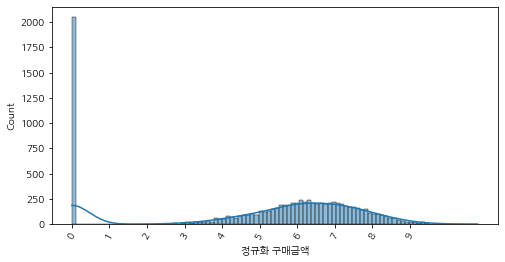

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,10,1), rotation=60)
sns.histplot(df2_copy["정규화 구매금액"],bins=100, kde=True)
plt.show()

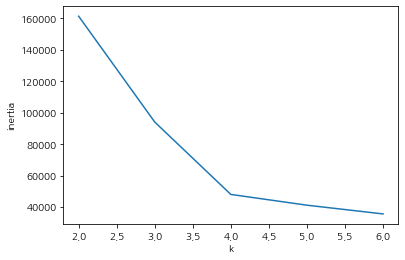

In [ ]:
# 엘보우 방법을 통한 클러스터 개수 확인
inertia = []
for k in range(2, 7) :
  km = KMeans(n_clusters = k)
  km.fit(df2_copy)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# 개수를 4로 지정해서 클러스터링
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit(df2_copy)

# cluster 값을 원본 데이터에 넣기
df2_copy["clusters"] = clusters.labels_
df2_copy

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액,clusters
0,4.568506,0.000000,1.098612,4.568506,5.312231,2
1,0.000000,0.000000,0.000000,0.000000,8.319725,1
2,6.651791,6.651791,2.564949,0.000000,6.434654,3
3,7.313220,7.313220,0.693147,0.000000,0.000000,3
4,2.833213,2.833213,0.693147,0.000000,6.521114,1
...,...,...,...,...,...,...
8945,5.677165,0.000000,1.945910,5.677165,5.788719,2
8946,5.707110,0.000000,1.945910,5.707110,5.623517,2
8947,4.979489,0.000000,1.791759,4.979489,4.410016,2
8948,0.000000,0.000000,0.000000,0.000000,3.980615,1


In [ ]:
df2_copy.groupby("clusters").count()

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
clusters,,,,,
0,2641,2641,2641,2641,2641
1,2103,2103,2103,2103,2103
2,2317,2317,2317,2317,2317
3,1889,1889,1889,1889,1889


# PCA

In [ ]:
from sklearn.decomposition import PCA
X = df2_copy.copy()

# 객체
pca = PCA(n_components = 2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-1.71728658, -3.04218363],
       [-6.70014432,  0.35209392],
       [ 1.30963937,  4.82680125],
       ...,
       [-1.16408424, -3.43856433],
       [-7.14793413,  0.12864408],
       [ 1.6413059 ,  4.89742081]])

In [ ]:
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = df2_copy["clusters"]
pca_df["pca_x"] = x_pca[:,0]
pca_df["pca_y"] = x_pca[:,1]

pca_df.head()

,0,1,cluster,pca_x,pca_y
0,-1.717287,-3.042184,2,-1.717287,-3.042184
1,-6.700144,0.352094,1,-6.700144,0.352094
2,1.309639,4.826801,3,1.309639,4.826801
3,0.888111,5.110870,3,0.888111,5.110870
4,-3.443311,2.161038,1,-3.443311,2.161038


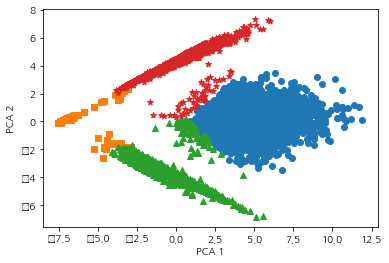

In [ ]:
# 군집 값이 0,1,2,3인 경우마다 별도의 인덱스로 추출
marker0 = pca_df[pca_df["cluster"]==0].index
marker1 = pca_df[pca_df["cluster"]==1].index
marker2 = pca_df[pca_df["cluster"]==2].index
marker3 = pca_df[pca_df["cluster"]==3].index


# 군집 값 0,1,2,3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출
plt.scatter(x=pca_df.loc[marker0, "pca_x"], y=pca_df.loc[marker0, "pca_y"], marker="o")
plt.scatter(x=pca_df.loc[marker1, "pca_x"], y=pca_df.loc[marker1, "pca_y"], marker="s")
plt.scatter(x=pca_df.loc[marker2, "pca_x"], y=pca_df.loc[marker2, "pca_y"], marker="^")
plt.scatter(x=pca_df.loc[marker3, "pca_x"], y=pca_df.loc[marker3, "pca_y"], marker="*")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

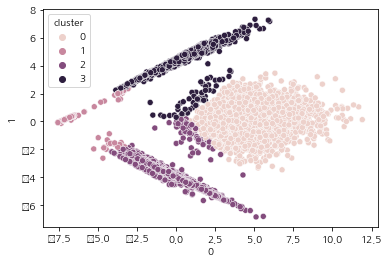

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue = "cluster", data = pca_df)

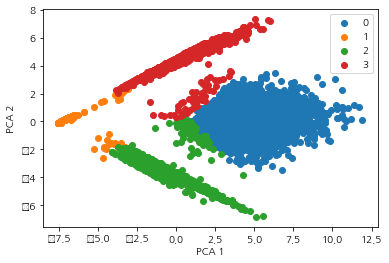

In [ ]:
for i in sorted(pca_df["cluster"].unique()) :
  tmp = pca_df.loc[pca_df["cluster"] == i]
  plt.scatter(tmp[0], tmp[1])
  plt.legend(sorted(pca_df["cluster"].unique()))
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")

# 인사이트

In [ ]:
df["clusters"] = clusters.labels_
df

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.340000,0.000000,12.0,3
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,2
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.340000,0.000000,6.0,2
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,2
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0,1


In [ ]:
df.groupby("clusters").count()

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간
clusters,,,,,,,,,,,,,,,,,,
0,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641,2641
1,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103
2,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317
3,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889,1889


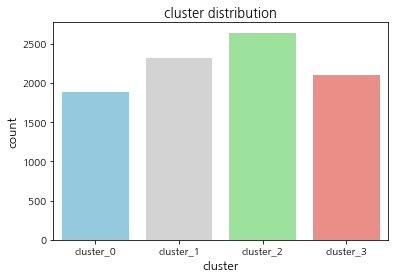

In [ ]:
y = [1889, 2317, 2641, 2103]
x = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
sns.barplot(x=x,y=y, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("cluster",fontsize=12)
plt.ylabel("count", fontsize=12)
plt.title("cluster distribution", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["잔액"].mean()

clusters
0    1836.658929
1    2127.960099
2     846.683984
3    1437.038961
Name: 잔액, dtype: float64

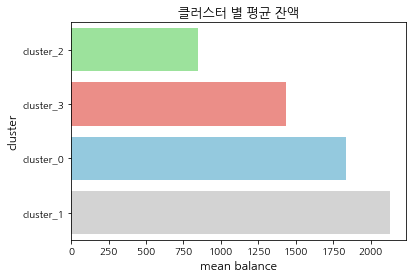

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [1836.66, 2127.96, 846.68, 1437.04]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean balance",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 잔액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["잔액 업데이트 빈도"].mean()

clusters
0    0.950468
1    0.877850
2    0.824374
3    0.839171
Name: 잔액 업데이트 빈도, dtype: float64

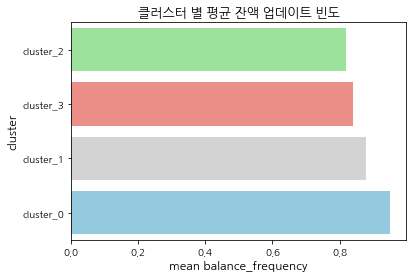

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.95, 0.88, 0.82, 0.84]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean balance_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 잔액 업데이트 빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["구매금액"].mean()

clusters
0    2366.518133
1       0.302910
2     532.999236
3     790.424891
Name: 구매금액, dtype: float64

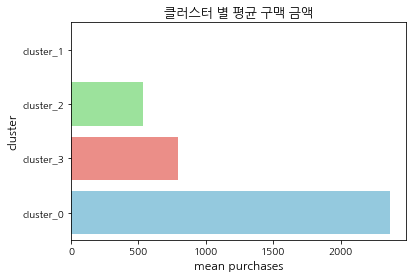

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [2366.52, 0.3, 533, 790.42]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 구맥 금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["일시불 구매금액"].mean()

clusters
0    1441.578372
1       0.171341
2       1.111187
3     789.926437
Name: 일시불 구매금액, dtype: float64

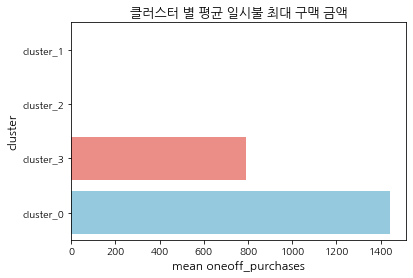

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [1441.58, 0.17, 1.11, 789.92]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean oneoff_purchases",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 일시불 최대 구맥 금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["할부 구매금액"].mean()

clusters
0    924.966729
1      0.172915
2    532.800807
3      0.717406
Name: 할부 구매금액, dtype: float64

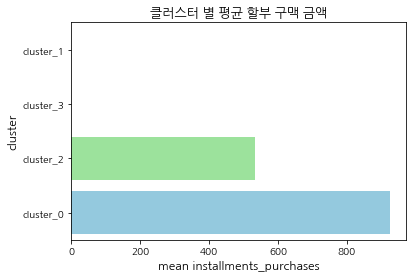

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [924.97, 0.17, 532.8, 0.72]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean installments_purchases",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 할부 구맥 금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["현금 선지급"].mean()

clusters
0     781.393139
1    1963.588377
2     409.332481
3     857.272346
Name: 현금 선지급, dtype: float64

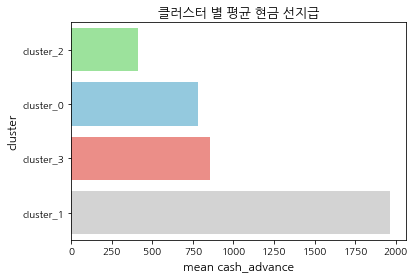

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [781.39, 1963.59, 409.33, 857.27]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean cash_advance",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 현금 선지급", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["구매빈도"].mean()

clusters
0    0.815737
1    0.004398
2    0.694557
3    0.325960
Name: 구매빈도, dtype: float64

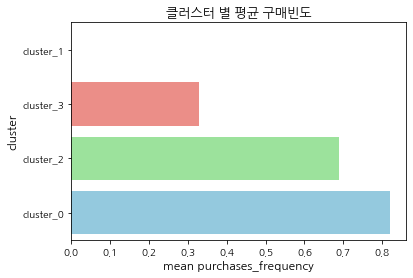

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.82, 0, 0.69, 0.33]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 구매빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["일회성 구매빈도"].mean()

clusters
0    0.449478
1    0.002860
2    0.003831
3    0.322939
Name: 일회성 구매빈도, dtype: float64

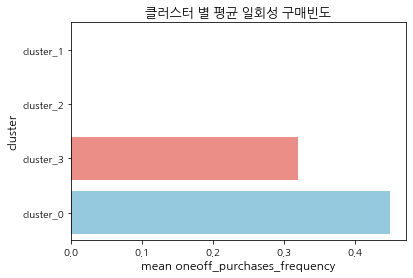

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.45, 0, 0, 0.32]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean oneoff_purchases_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 일회성 구매빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["할부 구매빈도"].mean()

clusters
0    0.654702
1    0.001617
2    0.656484
3    0.004326
Name: 할부 구매빈도, dtype: float64

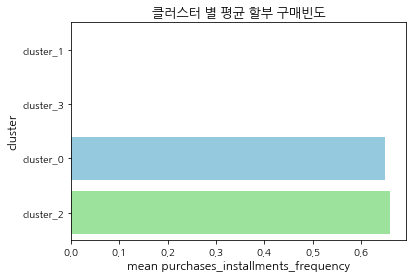

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.65, 0, 0.66, 0]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases_installments_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 할부 구매빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["현금 선지급 빈도"].mean()

clusters
0    0.107766
1    0.267810
2    0.053683
3    0.125645
Name: 현금 선지급 빈도, dtype: float64

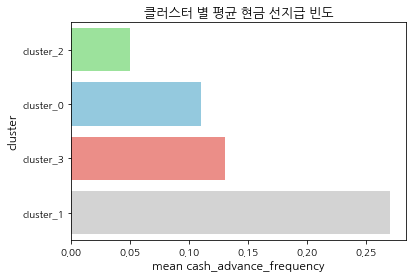

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.11, 0.27, 0.05, 0.13]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean cash_advance_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 현금 선지급 빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["현금 선지급 거래수"].mean()

clusters
0    2.867096
1    6.189253
2    1.272767
3    2.932769
Name: 현금 선지급 거래수, dtype: float64

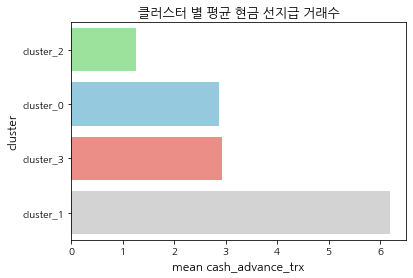

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [2.87, 6.19, 1.27, 2.93]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean cash_advance_trx",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 현금 선지급 거래수", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["구매건수"].mean()

clusters
0    34.230594
1     0.050880
2    11.887354
3     7.199576
Name: 구매건수, dtype: float64

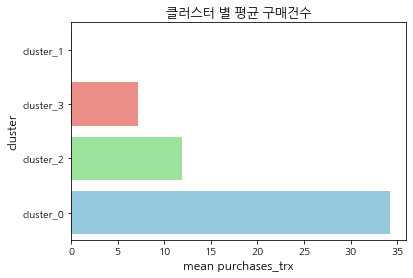

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [34.23, 0.05, 11.89, 7.2]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases_trx",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 구매건수", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["카드 한도"].mean()

clusters
0    5821.542192
1    4044.565484
2    3377.744231
3    4508.830390
Name: 카드 한도, dtype: float64

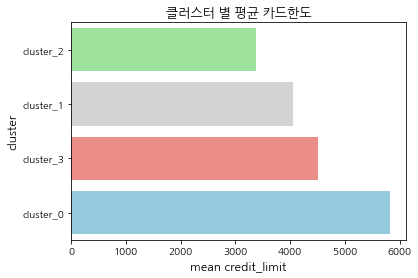

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [5821.54, 4044.57, 3377.74, 4508.83]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean credit_limit",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 카드한도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["지불금액"].mean()

clusters
0    2636.257349
1    1663.649946
2     964.345623
3    1490.861394
Name: 지불금액, dtype: float64

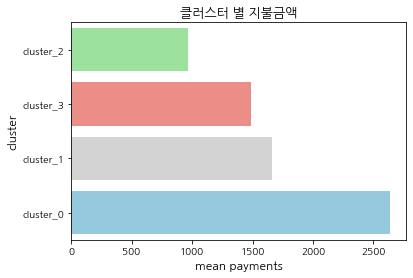

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [2636.26, 1663.65, 964.35, 1490.86]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean payments",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 지불금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["지불한 최소금액"].mean()

clusters
0    850.903283
1    970.608366
2    837.753820
3    705.354029
Name: 지불한 최소금액, dtype: float64

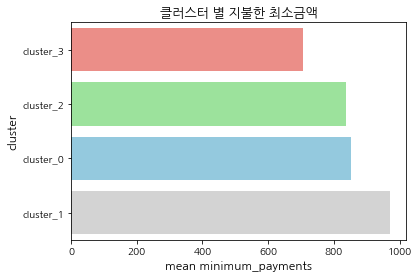

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [850.9, 970.61, 837.75, 705.35]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean minimum_payments",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 지불한 최소금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["카드 서비스 기간"].mean()

clusters
0    11.748959
1    11.330956
2    11.479499
3    11.447327
Name: 카드 서비스 기간, dtype: float64

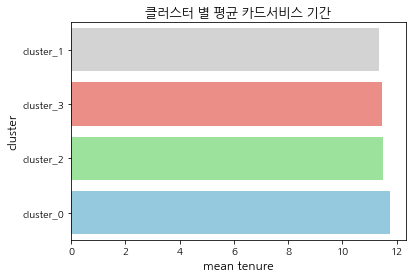

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [11.75, 11.33, 11.48, 11.45]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean tenure",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 카드서비스 기간", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["지불한 전액 지불비율"].mean()

clusters
0    0.192816
1    0.044820
2    0.250882
3    0.101096
Name: 지불한 전액 지불비율, dtype: float64

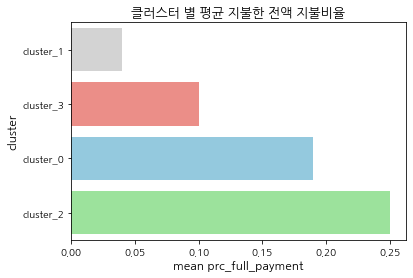

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.19, 0.04, 0.25, 0.1]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean prc_full_payment",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 지불한 전액 지불비율", fontsize=13)
plt.show()